In [59]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt
from manofunkcijos import pout

In [2]:
DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()
sql="""select lytis,amzius,group_concat(bdu_metinis separator ',') as algos
from DUS2018N
group by lytis, amzius;"""


C.execute(sql)
ans = C.fetchall()


lytis, amzius, algos= list(map(list, zip(*ans)))

pout(ans)

Rodoma 5 eilutės iš 10
|        F         |      14-29       |1380,4204,11692,12|
|        F         |      30-39       |4923,4786,17648,17|
|        F         |      40-49       |2446,4814,4811,287|
|        F         |      50-59       |4896,2129,6462,267|
|        F         |       60+        |2858,7213,6095,626|
|        M         |      14-29       |17334,1667,6605,78|


In [3]:
algosII = []
for i in algos:
    skaiciai = np.fromstring(i, sep=',')
    algosII.append(skaiciai)
print(algosII)

[array([ 1380.,  4204., 11692., ...,  5676.,  3947., 12503.]), array([ 4923.,  4786., 17648., ..., 10734., 20529.,  4800.]), array([2446., 4814., 4811., ..., 5146., 4800., 4800.]), array([ 4896.,  2129.,  6462., ..., 23876.,  4545.,   600.]), array([2858., 7213., 6095., ..., 3728.,  360., 4803.]), array([17334.,  1667.,  6605., ...,  5526.,  5526., 21152.]), array([ 2215., 24237., 39531., ..., 23498., 43205.,  4800.]), array([16532., 56665.,  1663., ...,  7800.,  4811.,  2828.]), array([16491., 16532.,  4800., ...,  2600.,  4927., 20887.]), array([ 5489.,  8473.,  2453., ..., 36000.,  6214.,  6389.])]


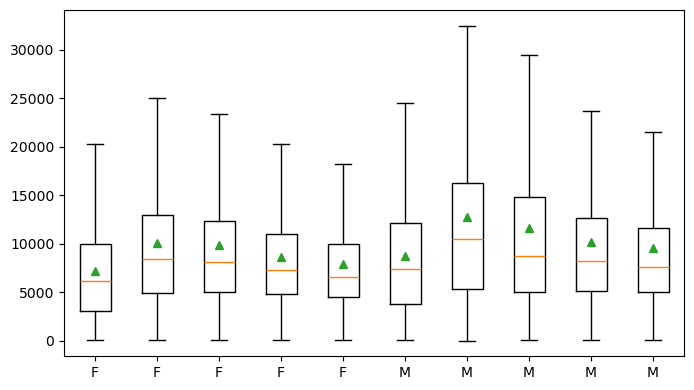

In [6]:
fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(algosII, showmeans=True, showfliers=False)

axis.set_xticklabels(lytis)

plt.show()

In [9]:

sql="""select issilavinimas,group_concat(bdu_metinis separator ',') as algos
from DUS2018N
group by issilavinimas;
"""

C.execute(sql)
ans = C.fetchall()


issilavinimas, algos= list(map(list, zip(*ans)))

pout(ans)

|        G1        |5674,7874,5336,590|
|        G2        |2446,16491,16532,1|
|        G3        |4204,11692,12647,1|
|        G4        |17648,2215,17334,2|


In [10]:
algosII = []
for i in algos:
    skaiciai = np.fromstring(i, sep=',')
    algosII.append(skaiciai)
print(algosII)

[array([5674., 7874., 5336., ..., 7233., 8926., 4105.]), array([ 2446., 16491., 16532., ...,  4800.,  4800.,  4800.]), array([ 4204., 11692., 12647., ..., 23498., 21152.,  4800.]), array([17648.,  2215., 17334., ...,  4589.,  1920., 43205.])]


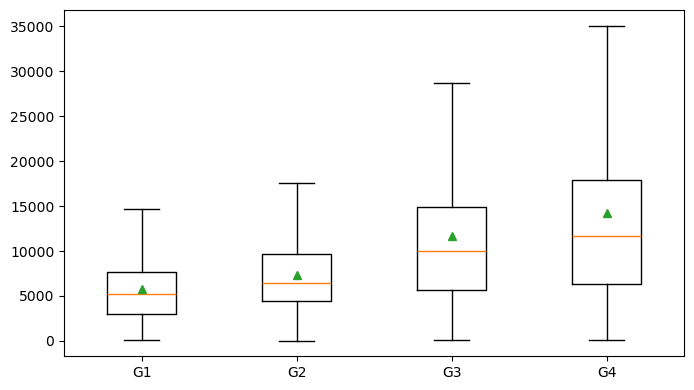

In [11]:
fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(algosII, showmeans=True, showfliers=False)

axis.set_xticklabels(issilavinimas)

plt.show()

In [ ]:
# 3) Pateikite su boxplot'u  skelbimų kainų pasiskirtymą top 5 automobilių gamintojams

In [14]:
sql="""select gamintojas, group_concat(price separator ',') as kainos
from autopliuslt
group by gamintojas
order by count(*) desc
limit 5;"""

C.execute(sql)
ans = C.fetchall()


gamintojas, kainos= list(map(list, zip(*ans)))

pout(ans)

|       BMW        |19 500,16 190,28 9|
|    Volkswagen    |16 490,6 500,7 300|
|       Audi       |1 200,5 500,7 100,|
|  Mercedes-Benz   |42 500,7 500,28 90|
|      Toyota      |11 900,4 250,4 350|


In [21]:
kainosII = []
for i in kainos:
    skaiciai1 = np.fromstring(i.replace(' ',''), sep=',')
    kainosII.append(skaiciai1)
print(kainosII)

[array([ 19500.,  16190.,  28900.,   3390.,   3750.,   6200.,  14995.,
        29500.,  37000.,   4900.,   5800.,   8000.,  10000.,  11600.,
        18390.,  22250.,   1150.,   2498.,   3200.,   3600.,   3900.,
         4000.,   4500.,   4900.,   5800.,   5900.,   6500.,   8900.,
         9000.,   9000.,  10295.,  11300.,  11500.,  11600.,  13100.,
        13300.,  13400.,  14400.,  14790.,  22600.,  24900.,  33800.,
        96499.,    900.,    999.,   1100.,   1250.,   1300.,   1300.,
         1550.,   1600.,   1700.,   1800.,   1800.,   1850.,   2000.,
         2150.,   2300.,   2400.,   2500.,   2600.,   2700.,   2800.,
         2800.,   2900.,   2900.,   3000.,   3400.,   3500.,   3500.,
         3500.,   3550.,   3650.,   3900.,   3900.,   3900.,   3900.,
         3900.,   4000.,   4000.,   4050.,   4200.,   4250.,   4300.,
         4500.,   4800.,   4800.,   4850.,   4850.,   4950.,   4999.,
         5000.,   5000.,   5000.,   5000.,   5100.,   5200.,   5350.,
         5499.,   5

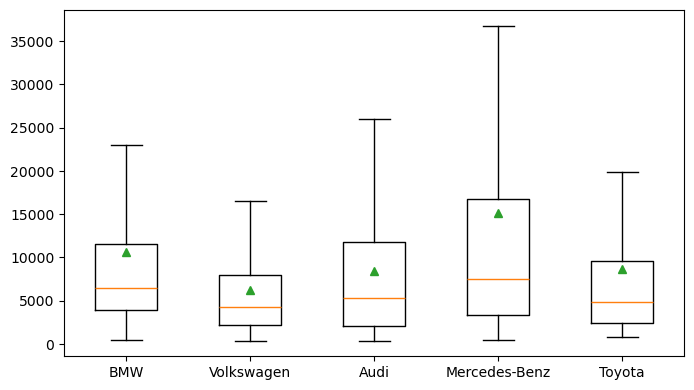

In [22]:
fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(kainosII, showmeans=True, showfliers=False)

axis.set_xticklabels(gamintojas)

plt.show()

In [ ]:
# -- pateikite su bar arba barh vidutines automobilių kainas
# -- top 5 gamintojams, dviem variantais:
# -- a) laikote, kad visi skelbimai yra unikalūs
# -- b) eliminuojate pasikartojančius skelbimus (jei skelbimo id kartojasi DB įrašuose
# -- tai skelbimas nėra unikalus, jis dubliuojasi)

In [23]:
sql="""select gamintojas, round(avg(price), 2) as vid_kaina
from autopliuslt
group by gamintojas
order by count(*) desc
limit 5;

"""

C.execute(sql)
ans = C.fetchall()


gamintojas, vid_kaina= list(map(list, zip(*ans)))

pout(ans)

|       BMW        |      30.92       |
|    Volkswagen    |       36.7       |
|       Audi       |      43.66       |
|  Mercedes-Benz   |      34.82       |
|      Toyota      |      25.68       |


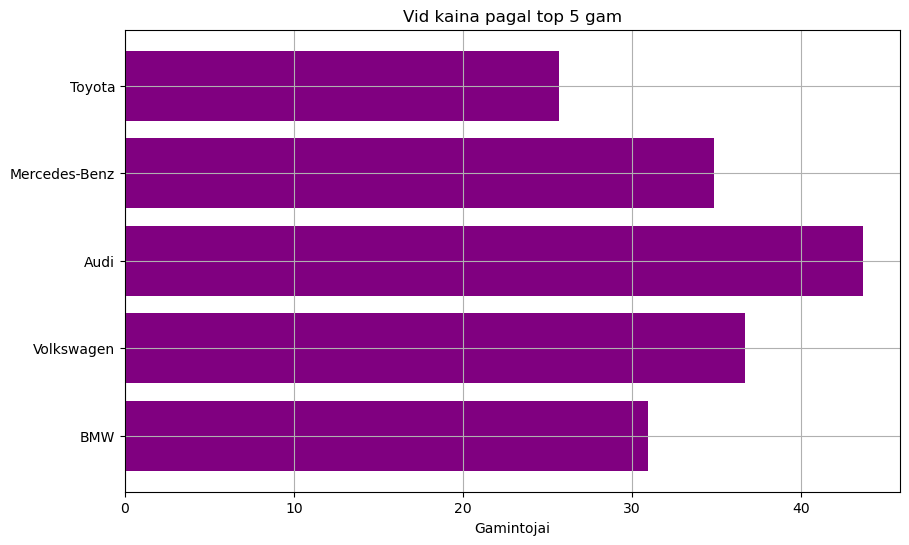

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(gamintojas, vid_kaina, color='purple')
plt.xlabel('Gamintojai')
plt.title('Vid kaina pagal top 5 gam')
plt.grid(True)
plt.show()

In [25]:
sql="""select gamintojas, round(avg(price), 2) as vid_kaina
from (
select distinct id, gamintojas, price
from autopliuslt
) as unikalus
group by gamintojas
order by count(*) desc
limit 5;"""

C.execute(sql)
ans = C.fetchall()


gamintojas, vid_kaina= list(map(list, zip(*ans)))

pout(ans)

|       BMW        |      35.82       |
|    Volkswagen    |      42.17       |
|       Audi       |      44.86       |
|  Mercedes-Benz   |      34.17       |
|      Toyota      |      31.13       |


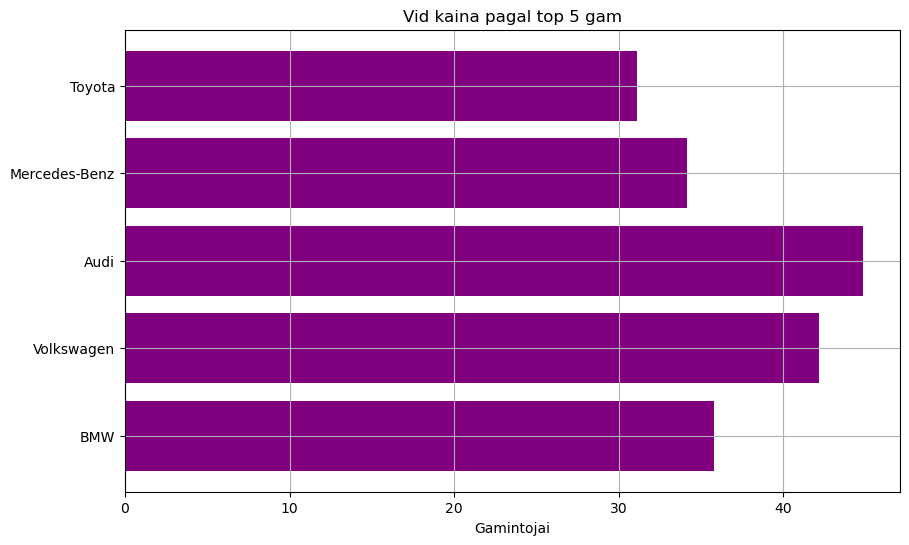

In [26]:
plt.figure(figsize=(10, 6))
plt.barh(gamintojas, vid_kaina, color='purple')
plt.xlabel('Gamintojai')
plt.title('Vid kaina pagal top 5 gam')
plt.grid(True)
plt.show()

In [27]:
sql="""select * from(
select gamintojas, round(avg(price), 2) as vid_kaina
from autopliuslt
group by gamintojas
order by count(*) desc
limit 5) as t1
join (
select gamintojas, round(avg(price), 2) as vid_kaina
from (
select distinct id, gamintojas, price
from autopliuslt
) as unikalus
group by gamintojas
order by count(*) desc
limit 5) as t2
using (gamintojas);"""

C.execute(sql)
ans = C.fetchall()


gamintojas, vid_kaina, unik= list(map(list, zip(*ans)))

pout(ans)

|       BMW        |      30.92       |      35.82       |
|    Volkswagen    |       36.7       |      42.17       |
|       Audi       |      43.66       |      44.86       |
|  Mercedes-Benz   |      34.82       |      34.17       |
|      Toyota      |      25.68       |      31.13       |


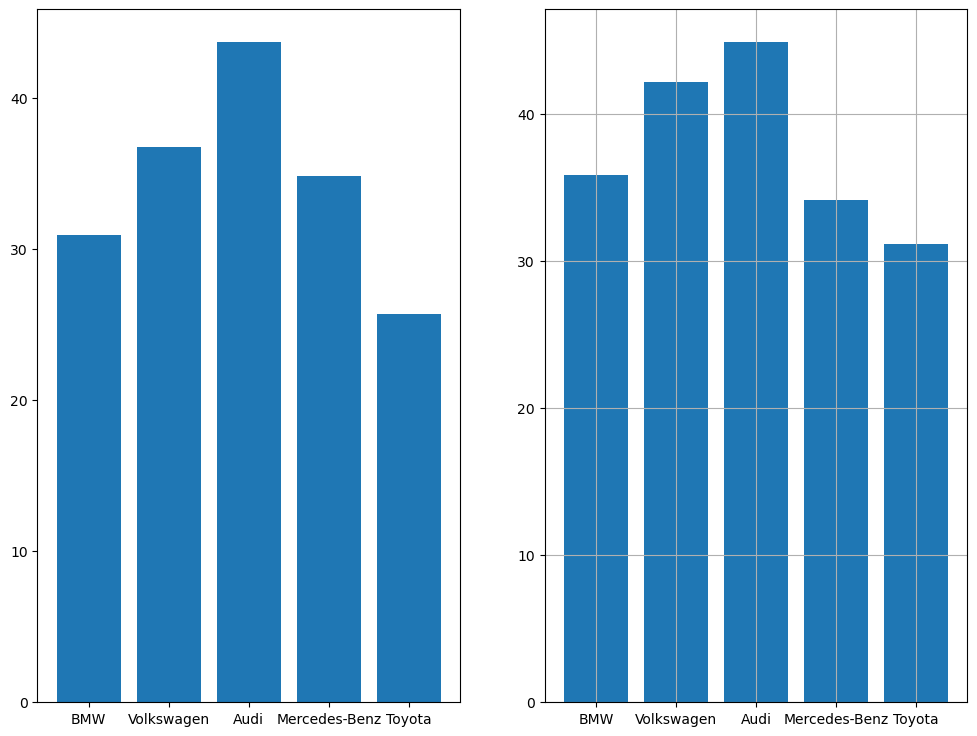

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,9))
ax1.bar(gamintojas, vid_kaina)
ax2.bar(gamintojas, unik)
plt.grid(True)
plt.show()

In [ ]:
# 3) papildymas: suraskite vidutinę kainą visų automobilių ir atvaizduokite brūkšnį ties ta kaina su komanda axis.axhline(y=JŪSŲ RASTAS SKAIČIUS)

In [45]:
sql="""select ceil(cast(replace(replace(rida, ' ', ''), 'km', '') as unsigned) / 15000) * 15000 as rida_interval,
       group_concat(price separator ', ') as kaina
from autopliuslt
where rida != 'Nenurodyta'
group by rida_interval
order by rida_interval;
"""

C.execute(sql)
ans = C.fetchall()


rida_inter, kaina= list(map(list, zip(*ans)))

pout(ans)

Rodoma 5 eilutės iš 43
|      15000       |5 900, 19 900, 29 |
|      30000       |16 800, 19 900, 10|
|      45000       |32 000, 14 950, 20|
|      60000       |41 321, 111 000, 6|
|      75000       |28 900, 21 900, 11|
|      90000       |14 000, 26 500, 35|


In [46]:
kainII = []
for i in kaina:
    skaiciai = np.fromstring(i.replace(' ', ''), sep=',')
    kainII.append(skaiciai)
print(kainII)

[array([ 5900., 19900., 29900., 37000.,  1850.,  2100.,  3800.,  4200.,
        8500., 17200., 74950.,  5900., 17500., 20700., 29900., 37000.,
       42999.,  2100.,  3800.,  4200.,  8500., 12200., 13600., 14000.,
       15000., 15200., 16400., 19400., 21800., 23650., 27490., 27500.,
       32223., 32808., 34990., 34990., 35528., 36355., 36900., 40480.,
       40990., 56000., 56800., 57500., 62300., 92000.,  1050.,  1800.]), array([ 16800.,  19900., 100000.,  18600.,  26050., 145000.,   1750.,
         2400.,  16800., 100000.,  18600.,  19000., 145000.,   2400.,
         8700.,  13700.,  13999.,  22500.,  23550.,  23600.,  24000.,
        24200.,  24590.,  25500.,  26500.,  32222.,  33500.,  33900.,
        45350.,  49900.,  85000.,  88800.]), array([ 32000.,  14950.,  20800.,  26000.,  96499.,   6500.,   8900.,
        32000.,  14950.,  15450.,  20800.,  26000.,  96499.,   3500.,
         6500.,   8900.,  10400.,  13500.,  13900.,  18500.,  19390.,
        19600.,  19800.,  19900.,  2

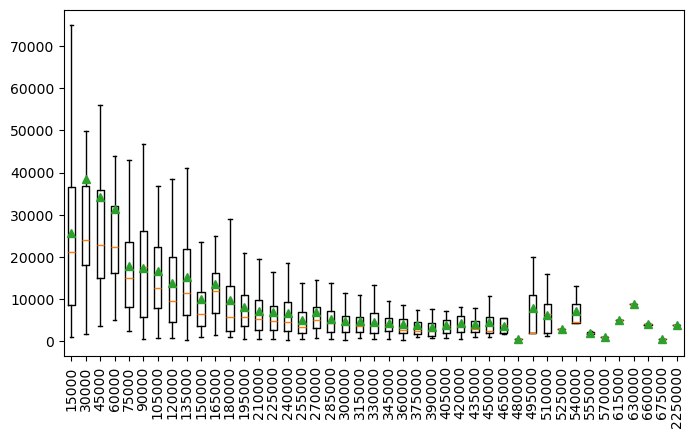

In [47]:
fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(kainII, showmeans=True, showfliers=False)
axis.tick_params(axis='x', rotation=90)
axis.set_xticklabels(rida_inter)

plt.show()

In [48]:
sql="""select kuro_tipas, group_concat(replace(replace(rida, ' ', ''), 'km', '') separator ',') as all_ridas
from autopliuslt
where rida != 'nenurodyta'
group by kuro_tipas;"""

C.execute(sql)
ans = C.fetchall()


kuro_tipas, ridas= list(map(list, zip(*ans)))

pout(ans)

Rodoma 5 eilutės iš 7
|     Benzinas     |253000,195405,1830|
| Benzinas / dujos |258000,155000,2067|
|Benzinas / elektra|292000,209000,4500|
|Benzinas / elektra|250000,240000,6900|
|    Dyzelinas     |129800,127896,1021|
|Dyzelinas / elektr|218000,263000,7800|


In [53]:
ridasII = []
for i in ridas:
    skaiciai = np.fromstring(i, sep=',')
    ridasII.append(skaiciai)
print(ridasII)

[array([2.53000e+05, 1.95405e+05, 1.83000e+05, 1.94000e+05, 1.90000e+05,
       2.17000e+05, 2.16000e+05, 1.03149e+05, 8.98110e+04, 8.47500e+04,
       2.22000e+05, 2.25100e+05, 1.90000e+04, 1.87856e+05, 1.11000e+05,
       6.10000e+04, 3.15000e+05, 1.05000e+05, 1.80000e+05, 2.08281e+05,
       2.15000e+05, 1.55224e+05, 2.16763e+05, 9.00000e+03, 3.20000e+05,
       2.93325e+05, 1.85000e+05, 1.55000e+05, 2.10000e+05, 2.31000e+05,
       1.13000e+05, 1.60000e+05, 1.43176e+05, 2.30000e+05, 1.89336e+05,
       7.30000e+04, 9.10000e+04, 9.15670e+04, 6.10000e+04, 1.76850e+05,
       7.82000e+04, 2.70000e+04, 7.27630e+04, 1.52940e+05, 7.59050e+04,
       6.82740e+04, 3.50000e+04, 2.33620e+04, 1.58000e+05, 6.80000e+04,
       2.30000e+04, 1.25000e+05, 3.20000e+05, 2.13000e+05, 2.80452e+05,
       1.16375e+05, 2.50000e+05, 1.66000e+05, 2.15800e+05, 1.98087e+05,
       2.50000e+05, 2.48585e+05, 2.68777e+05, 1.92000e+05, 2.25287e+05,
       2.80000e+05, 1.80000e+05, 1.09945e+05, 2.26000e+05, 2.88

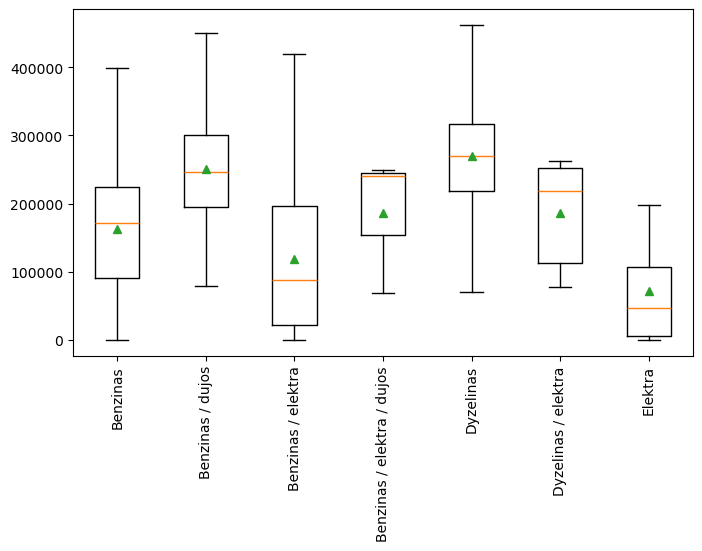

In [54]:
fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(ridasII, showmeans=True, showfliers=False)
axis.tick_params(axis='x', rotation=90)
axis.set_xticklabels(kuro_tipas)

plt.show()

In [55]:
sql="""select gamintojas, group_concat(replace(replace(rida, ' ', ''), 'km', '') separator ',') as all_ridas
from autopliuslt
where rida != 'nenurodyta'
group by gamintojas;"""

C.execute(sql)
ans = C.fetchall()


gamintojas, ridos= list(map(list, zip(*ans)))

pout(ans)

Rodoma 5 eilutės iš 51
|    Alfa Romeo    |308615,308615,3050|
|   Aston Martin   |      45000       |
|       Audi       |194000,280058,3975|
|       BMW        |253000,158486,7445|
|     Cadillac     |245000,245000,2726|
|    Chevrolet     |264000,264000,2480|


In [56]:
ridosII = []
for i in ridos:
    skaiciai = np.fromstring(i, sep=',')
    ridosII.append(skaiciai)
print(ridosII)

[array([308615., 308615., 305000.]), array([45000.]), array([194000., 280058., 397576., 260000., 235846., 111000., 105550.,
       280000., 416080., 217000., 211500., 251211., 231000., 289543.,
       285000., 230000.,  91000., 217922., 168641., 227000., 259500.,
       266000., 265639., 239000., 260000.,  35000., 240000., 213000.,
       322000., 280452., 250000., 499000., 288130., 330000., 359039.,
       234675., 293406., 310232., 216000., 400770., 289000., 356852.,
       250000., 300045., 338000., 303000., 433000., 290000., 237728.,
       233350., 274515., 397006., 345000., 290000., 224000., 241000.,
       401442., 195600., 265936., 250622., 317000., 237314., 341000.,
       222000., 275000., 170000., 258900., 253548., 353000., 222070.,
       217510., 284800., 408000., 265000., 225000., 143500., 268230.,
       387993., 258165., 346000., 261000., 261300., 272172., 450000.,
       270000., 168000., 315000., 243000., 260000., 310000., 194000.,
       280058.,  54500., 105550., 41

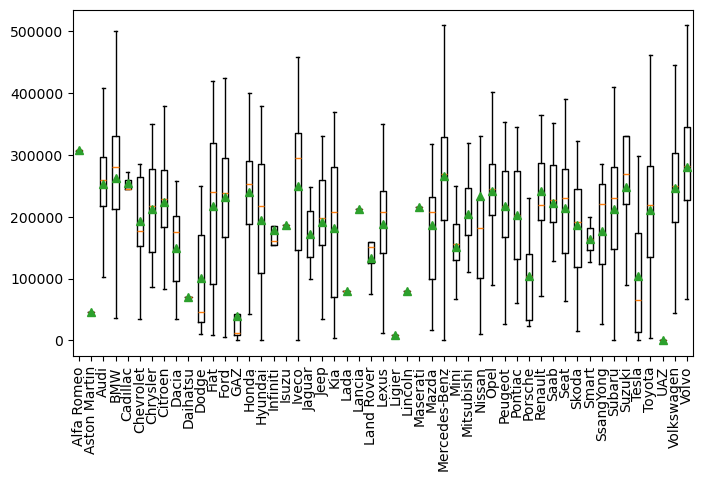

In [57]:
fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(ridosII, showmeans=True, showfliers=False)
axis.tick_params(axis='x', rotation=90)
axis.set_xticklabels(gamintojas)

plt.show()

In [67]:
DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()




sql="""select gamintojas, modelis, group_concat(replace(price, ' ', '') order by price separator ',') as prices
from autopliuslt
where gamintojas in (
select gamintojas
from (
select gamintojas, round(avg(cast(replace(price, ' ', '') as unsigned)), 2) as avg_price
from autopliuslt
group by gamintojas
having avg_price > (
select round(avg(cast(replace(price, ' ', '') as unsigned)), 2)
from autopliuslt
)
order by avg_price desc
limit 5
) as top5
)
and price != 'nenurodyta'
group by gamintojas, modelis;

"""

C.execute(sql)
ans = C.fetchall()


gamintojas, modelis, kaina= list(map(list, zip(*ans)))

pout(ans)


Rodoma 5 eilutės iš 13
|   Aston Martin   |       DB9        |      125000      |
|    Land Rover    |    Discovery     |      34900       |
|    Land Rover    |      Evoque      |      17000       |
|    Land Rover    |Range Rover Velar |   55900,55900    |
|     Maserati     |     Levante      |      34950       |
|     Porsche      |       911        |145000,145000,2999|


In [64]:
kainaII = []
for i in kaina:
    skaiciai = np.fromstring(i.replace(' ', ''), sep=',')
    kainaII.append(skaiciai)
print(kainaII)

[array([125000.]), array([34900.]), array([17000.]), array([55900., 55900.]), array([34950.]), array([145000., 145000.,  29999.]), array([21800., 27200., 30500., 36000.]), array([41700., 54000.]), array([88800.]), array([21800.]), array([25900., 28500., 35000., 35000.]), array([60000., 85000.]), array([57500., 62300.])]


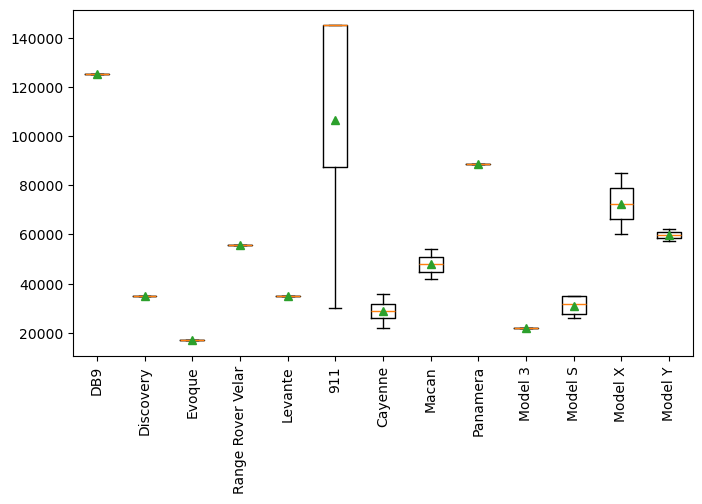

In [65]:
fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(kainaII, showmeans=True, showfliers=False)
axis.tick_params(axis='x', rotation=90)
axis.set_xticklabels(modelis)

plt.show()

In [ ]:
sql="""select gamintojas, round(avg(year(curdate()) - CASE 
when length(pagaminimo_data) = 4 then pagaminimo_data
when length(pagaminimo_data) = 7 then left(pagaminimo_data, 4)
else null
end), 2)  as avg_age
from autopliuslt
where gamintojas in (
    select gamintojas
    from (
        select gamintojas, round(avg(cast(replace(price, ' ', '') as unsigned)), 2) as avg_price
        from autopliuslt
        group by gamintojas
        having avg_price > (
            select round(avg(cast(replace(price, ' ', '') as unsigned)), 2)
            from autopliuslt
        )
        order by avg_price desc
        limit 5
    ) as top5
)
group by gamintojas;"""

C.execute(sql)
ans = C.fetchall()


gamintojas, modelis, kaina= list(map(list, zip(*ans)))

pout(ans)